# Extracting Layers from ARIA standard GUNW products

**Author**: Emre Havazli, David Bekaert, Brett A. Buzzanga - Jet Propulsion Laboratory

This notebook is intended for the extraction of data, specifically:
- unwrappedPhase, coherence, amplitude, bPerpendicular, bParallel, incidenceAngle, lookAngle, azimuthAngle
- product bounding box, 

It is also capable of:
- merging products
- downloading DEM

To illustrate the usage of extractProduct.py we will use data from ARIA system covering eastern United States between Cleveland, OH and Buffalo, NY with northern parts of the frame over Lake Erie.

## 0. Initial setup of the notebook

The cell below performs initial setup of the notebook and must be run every time the notebook is used. It loads the required modules into our python environment and using ***import*** command. You must add the path to the ARIA-tools to your path, if they are not already there. It is possible to partially complete the exercise, close the notebook, and come back and continue later from that point, but this initialization must be re-run before restarting.

In [57]:
import os
from subprocess import run
import numpy as np
import matplotlib.pyplot as plt

## add the aria tools to your path
path_tools = os.path.join('tools', 'python')
os.sys.path.append(path_tools)
os.environ["PATH"] += os.pathsep + path_tools

## 1. Extract Orbital Information


### 1.1. Download DEM
First we will need to download the digital elevation model (DEM) to use for subsequent analysis
We provide the data as **fileName**, and the location to save to -w **dest** (it will be created if it does not exist).
Since a layer is required, we extract the perpendicular baseline 

In [59]:
fileName = 'data/S1-GUNW-A-R-077-tops-20190222_20190210-231605-42666N_40796N-PP-d75b-v2_0_1.nc'
dest     = './res'
layers   = ['bPerpendicular']
cmd      = "-f {} --layers '{}' -w {} --demfile=Download".format(fileName, ','.join(layers), dest)
print ('Running extractProduct.py {}'.format(cmd))
!extractProduct.py {cmd}
print ('Finished Download and {}'.format(layers))

Running extractProduct.py -f data/S1-GUNW-A-R-077-tops-20190222_20190210-231605-42666N_40796N-PP-d75b-v2_0_1.nc --layers 'bPerpendicular' -w ./res --demfile=Download
########################################
class 'Aria_standardproduct': sort input file(s) by starting time
if user bbox was specified, file(s) not meeting imposed spatial criteria are rejected.

Outputs = arrays ['standardproduct_info.products'] containing grouped “radarmetadata info” and “data layer keys+paths” dictionaries for each standard product + path to bbox file ['standardproduct_info.bbox_file'] (if bbox specified).

All 1 input files successfully passed!
Group spatiotemporally continuous IFGs.

All 1 input files successfully passed!


########################################
fn 'merged_productbbox': extract/merge productBoundingBox layers for each pair and update dict, report common track bbox (default is to take common intersection, but user may specify union), and expected shape for DEM.



####################

### 1.2.  Extract and save the orbital information to disk.
We now provide the downloaded DEM in input variable **dem**.
We provide the layer names as **layers**.
For details on orbital charateristics, see https://earth.esa.int/handbooks/asar/CNTR5-5.html

In [60]:
dem      = './res/SRTM_3arcsec'
layers   = ['bParallel', 'incidenceAngle', 'lookAngle', 'azimuthAngle']
cmd      = "-f {} --layers '{}' -w {} --demfile=Download".format(fileName, ','.join(layers), dest)

print ('Running extractProduct.py {}'.format(cmd))
!extractProduct.py {cmd}
print ('Finished Processing {}'.format(layers))

Running extractProduct.py -f data/S1-GUNW-A-R-077-tops-20190222_20190210-231605-42666N_40796N-PP-d75b-v2_0_1.nc --layers 'bParallel,incidenceAngle,lookAngle,azimuthAngle' -w ./res --demfile=Download
########################################
class 'Aria_standardproduct': sort input file(s) by starting time
if user bbox was specified, file(s) not meeting imposed spatial criteria are rejected.

Outputs = arrays ['standardproduct_info.products'] containing grouped “radarmetadata info” and “data layer keys+paths” dictionaries for each standard product + path to bbox file ['standardproduct_info.bbox_file'] (if bbox specified).

All 1 input files successfully passed!
Group spatiotemporally continuous IFGs.

All 1 input files successfully passed!


########################################
fn 'merged_productbbox': extract/merge productBoundingBox layers for each pair and update dict, report common track bbox (default is to take common intersection, but user may specify union), and expected shape

## END EXTRACT PRODUCT ------------------------------------------------------------------------
Below here is template for further development

### 1.2 Reading the metadata

Now we can access to the metadata of the file and see how it is structured. The cell below shows how to read the metadata into a variable and then print it.

In [46]:
##Retrieve an overview of the file content##
dataInfo = gdal.Info(ds)
print(dataInfo)

Driver: netCDF/Network Common Data Format
Files: ./data/S1-GUNW-A-R-077-tops-20190222_20190210-231605-42666N_40796N-PP-d75b-v2_0_1.nc
Size is 512, 512
Metadata:
  NC_GLOBAL#author=David Bekaert
  NC_GLOBAL#Conventions=CF-1.6
  NC_GLOBAL#institution=Jet Propulsion Laboratory
  NC_GLOBAL#ogr_geometry_field=productBoundingBox
  NC_GLOBAL#ogr_layer_name=productBoundingBox
  NC_GLOBAL#ogr_layer_type=POLYGON
  NC_GLOBAL#product_type=UNW GEO IFG
  NC_GLOBAL#references=https://aria.jpl.nasa.gov/
  NC_GLOBAL#source=Contains modified Copernicus Sentinel data processed by ESA and ARIA NASA/JPL
  NC_GLOBAL#title=ARIA standard product UNW GEO IFG
  NC_GLOBAL#version=1b
Subdatasets:
  SUBDATASET_1_NAME=NETCDF:"./data/S1-GUNW-A-R-077-tops-20190222_20190210-231605-42666N_40796N-PP-d75b-v2_0_1.nc":productBoundingBox
  SUBDATASET_1_DESC=[1x464] productBoundingBox (8-bit character)
  SUBDATASET_2_NAME=NETCDF:"./data/S1-GUNW-A-R-077-tops-20190222_20190210-231605-42666N_40796N-PP-d75b-v2_0_1.nc":/science/g

**This output can be generated by using the command below in your terminal under the JupyterDocs folder**

gdalinfo ./data/S1-GUNW-A-R-077-tops-20190222_20190210-231605-42666N_40796N-PP-d75b-v2_0_1.nc

## 2. Accessing to subdatasets

We can access to subdatasets, such as unwrapped phase, and their metadata the same way we accessed the products. We need to open the specific subdataset, which we can obtaing their location in the file using the information we printed above, and again read its metadata.

In [47]:
##Open and retrieve information of the unwrapped phase##

unwPhase = gdal.Open("NETCDF:"+fileName+":/science/grids/data/unwrappedPhase")
unwPhaseInfo = gdal.Info(unwPhase)
print(unwPhaseInfo)

Driver: netCDF/Network Common Data Format
Files: ./data/S1-GUNW-A-R-077-tops-20190222_20190210-231605-42666N_40796N-PP-d75b-v2_0_1.nc
Size is 4232, 2246
Coordinate System is:
GEOGCRS["unknown",
    DATUM["unnamed",
        ELLIPSOID["Spheroid",6378137,298.257223563,
            LENGTHUNIT["metre",1,
                ID["EPSG",9001]]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433,
            ID["EPSG",9122]]],
    CS[ellipsoidal,2],
        AXIS["latitude",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]],
        AXIS["longitude",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]]
Data axis to CRS axis mapping: 2,1
Origin = (-81.866250000000022,42.667083333333366)
Pixel Size = (0.000833333333333,-0.000833333333333)
Metadata:
  /science/grids/data/crs#crs_wkt=GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTH

**This output can be generated by using the command below in your terminal under the JupyterDocs folder**

gdalinfo gdalinfo NETCDF:"./data/S1-GUNW-A-R-077-tops-20190222_20190210-231605-42666N_40796N-PP-d75b-v2_0_1.nc":/science/grids/data/unwrappedPhase

## 3. Reading the subdataset into an array and plotting

### 3.1 Reading the subdataset into an array

Reading data sets into python arrays enables us to take advantage of the whole flexibility and operational capabilities of python. Here were are going to read our unwrapped phase into an array which is technically a 2D matrix in this case. Python arrays are not necessarily always matrices and have the capabililty to expand into n-dimensions. The cell below shows how to read unwrapped phase into a variable. We are using variable, unwPhase, which is the instance we opened the unwrapped phase subdataset in the previous cell and calling GetRasterBand(1). We are calling raster band 1 because our subdataset has only 1 band as we see in the output of the previous cell.

In [48]:
unwData = unwPhase.GetRasterBand(1).ReadAsArray()

### 3.2 Retrieving the information required for plotting

When we want to plot the data using python we need to extract some more information from the subdataset. We are going to need "No Data Value", "Projection" and "Corner Coordinates". The cell below shows how to extract this information from unwrapped phase subdataset.

In [49]:
##Get No Data Value##
NDV = unwPhase.GetRasterBand(1).GetNoDataValue()

##Get Projection##
projection = osr.SpatialReference()
projection.ImportFromWkt(unwPhase.GetProjectionRef())

##Get corner coordinates##
ulLon, Lonres, Lonskew, ulLat, Latskew, Latres  = unwPhase.GetGeoTransform()
lrLon = ulLon + (unwPhase.RasterXSize * Lonres)
lrLat = ulLat + (unwPhase.RasterYSize * Latres)

###Let's round corner coordinates to the same number of digits as given in previous cell###
ulLon = np.round(ulLon,7)
ulLat = np.round(ulLat,7)
lrLon = np.round(lrLon,7)
lrLat = np.round(lrLat,7)

###Corner coordinates taken from previous cell###
print('''
Corner Coordinates from previous cell:
Upper Left  ( -81.8662500,  42.6670833)
Lower Left  ( -81.8662500,  40.7954167)
Upper Right ( -78.3395833,  42.6670833)
Lower Right ( -78.3395833,  40.7954167)
''')

###Corner coordinates calculated in this cell###
print('''
Corner Coordinates calculated in this cell: ''',
'''Upper Left: ''', (ulLon,  ulLat),
'''Lower Left: ''', (ulLon,  lrLat),
'''Upper Right: ''', (lrLon,  ulLat),
'''Lower Right: ''', (lrLon,  lrLat), sep='\n')



Corner Coordinates from previous cell:
Upper Left  ( -81.8662500,  42.6670833)
Lower Left  ( -81.8662500,  40.7954167)
Upper Right ( -78.3395833,  42.6670833)
Lower Right ( -78.3395833,  40.7954167)


Corner Coordinates calculated in this cell: 
Upper Left: 
(-81.86625, 42.6670833)
Lower Left: 
(-81.86625, 40.7954167)
Upper Right: 
(-78.3395833, 42.6670833)
Lower Right: 
(-78.3395833, 40.7954167)


### 3.3 Masking the array 
After getting the required information for a plot let's do a final operation in the dataset and mask the no-data areas using the No Data Value (NDV) we got in the previous cell. We can carry out this operation using numpy module of python as below.

In [50]:
unwDataMasked = np.ma.masked_array(unwData, mask=unwData==NDV, fill_value=999999)

### 3.4 Plotting the data

We can use various methods to plot our dataset. The cell below is showing how to plot using Basemap module.

Before starting to use Basemap module, we need to make sure that our **PROJ_LIB** directory has the epsg. Unfortunately this file is not automatically installed with PROJ4 version 6 but it comes with the previous versions. Since we only installed previous versions to use with Basemap, we can copy the epsg file from that directory (in case of conda installation of Basemap, /python/install/dir/share/proj/epsg) to our **PROJ_LIB** directory (/my/proj/install/dir/share/proj)

Make sure that you have basemap-data-hires package installed for a high resolution plot. The command below can be used for Anaconda python installations.

conda install -c conda-forge basemap-data-hires


**NOTE TO SELF:
TODO list to improve the cell below**
- automatic projection extraction
- plotted data is flipped (related to projection?)

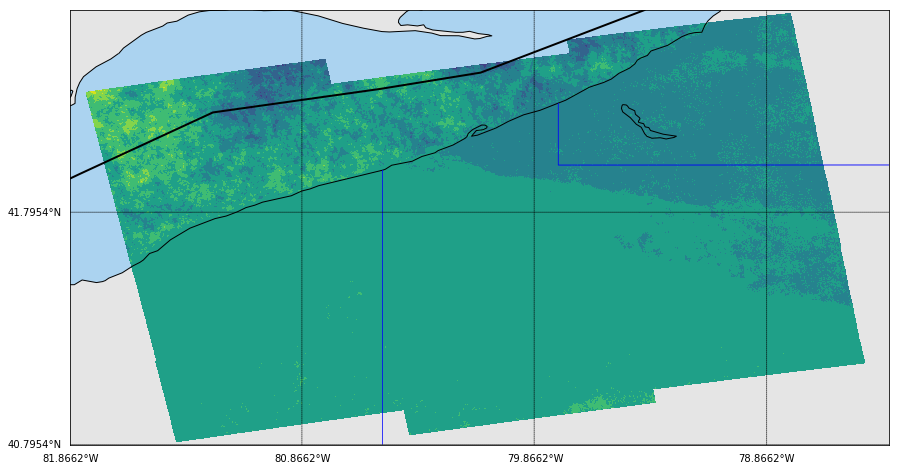

In [175]:
from mpl_toolkits.basemap import Basemap

plt.rcParams['figure.figsize'] = [20, 8]

m = Basemap(projection='cyl',
            llcrnrlat = lrLat,
            llcrnrlon = ulLon,
            urcrnrlat = ulLat,
            urcrnrlon = lrLon,
            resolution='h')

lats = np.linspace(lrLat,ulLat,unwDataMasked.shape[0])
lons = np.linspace(ulLon,lrLon,unwDataMasked.shape[1])
x, y = m(*np.meshgrid(lons,lats))

m.contourf(x,y,np.flipud(unwDataMasked),cmap='viridis')
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')

m.drawparallels(np.arange(m.latmin,m.latmax,1),labels=[1,0,0,0])
m.drawmeridians(np.arange(m.lonmin,m.lonmax,1),labels=[0,0,0,1])
# m.colorbar()
m.fillcontinents(color='0.8', lake_color='#73C2FB',alpha=0.5,zorder=0)




## 4. Cropping the data at given boundaries and creating KMZ files

### 4.1 Exporting the data as KMZ
In this section we are going to use gdal capability to export the data into a KMZ file which can be viewed in Google Earth. We can do this operation using the simple gdal.Translate function. We only need to define output name, input data (unwPhase) and the options. We define the options using gdal.ParseCommandLine() function which allows us to pass gdal_translate options in notebook environment.

**Note:** Be aware that input data here is not our python array but the unwPhase which we opened using gdal.Open in previous section.

In [177]:
translateOptions = gdal.TranslateOptions(gdal.ParseCommandLine('-of KMLSUPEROVERLAY -scale -co format=png'))
kmzFile = gdal.Translate("unwrappedPhase.kmz", unwPhase, options=translateOptions)

### 4.2 Cropping the data and exporting as KMZ

By only adding the **projwin** option into gdal.TranslateOptions we can crop the data and export the cropped plot into a KMZ file

In [178]:
translateOptions = gdal.TranslateOptions(gdal.ParseCommandLine('-of KMLSUPEROVERLAY -scale -co format=png -projwin -81.00 42.30 -80.00 41.50'))
kmzFileCrop = gdal.Translate("unwrappedPhaseCrop.kmz", unwPhase, options=translateOptions)